# **Trabalho Prático: Previsão de Incidentes Rodoviários**

## Descrição do Problema

## Preparação do programa

### Bibliotecas e Funções

In [782]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

#Modelo a usar
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#Métricas de qualidade
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Leitura dos datasets

In [783]:
dftrain = pd.read_csv('training_data.csv')
dftest = pd.read_csv('test_data.csv')

## Exploração dos dados

Para esta etapa do trabalho, também se utilizou as informações obtidas no website "kaggle", tais como:
* Tipos dos atributos
* Conteúdo dos atributos
* Missing values

### Visualização dos dados

In [784]:
dftrain.shape

(5000, 13)

In [785]:
dftrain.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [786]:
dftrain.tail()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
4995,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,0.0,Sem Chuva,High
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,0.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None
4999,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-12-20 02:00,DARK,12.0,1018.0,77.0,3.0,0.0,Sem Chuva,None


### Informações sobre os diferentes atributos

In [787]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [788]:
dftrain.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


### Missing Values

In [789]:
dftrain.isna().any()

city_name             False
magnitude_of_delay    False
delay_in_seconds      False
affected_roads         True
record_date           False
luminosity            False
avg_temperature       False
avg_atm_pressure      False
avg_humidity          False
avg_wind_speed        False
avg_precipitation     False
avg_rain              False
incidents             False
dtype: bool

In [790]:
dftrain.isna().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

### Matriz de Correlação

<AxesSubplot:>

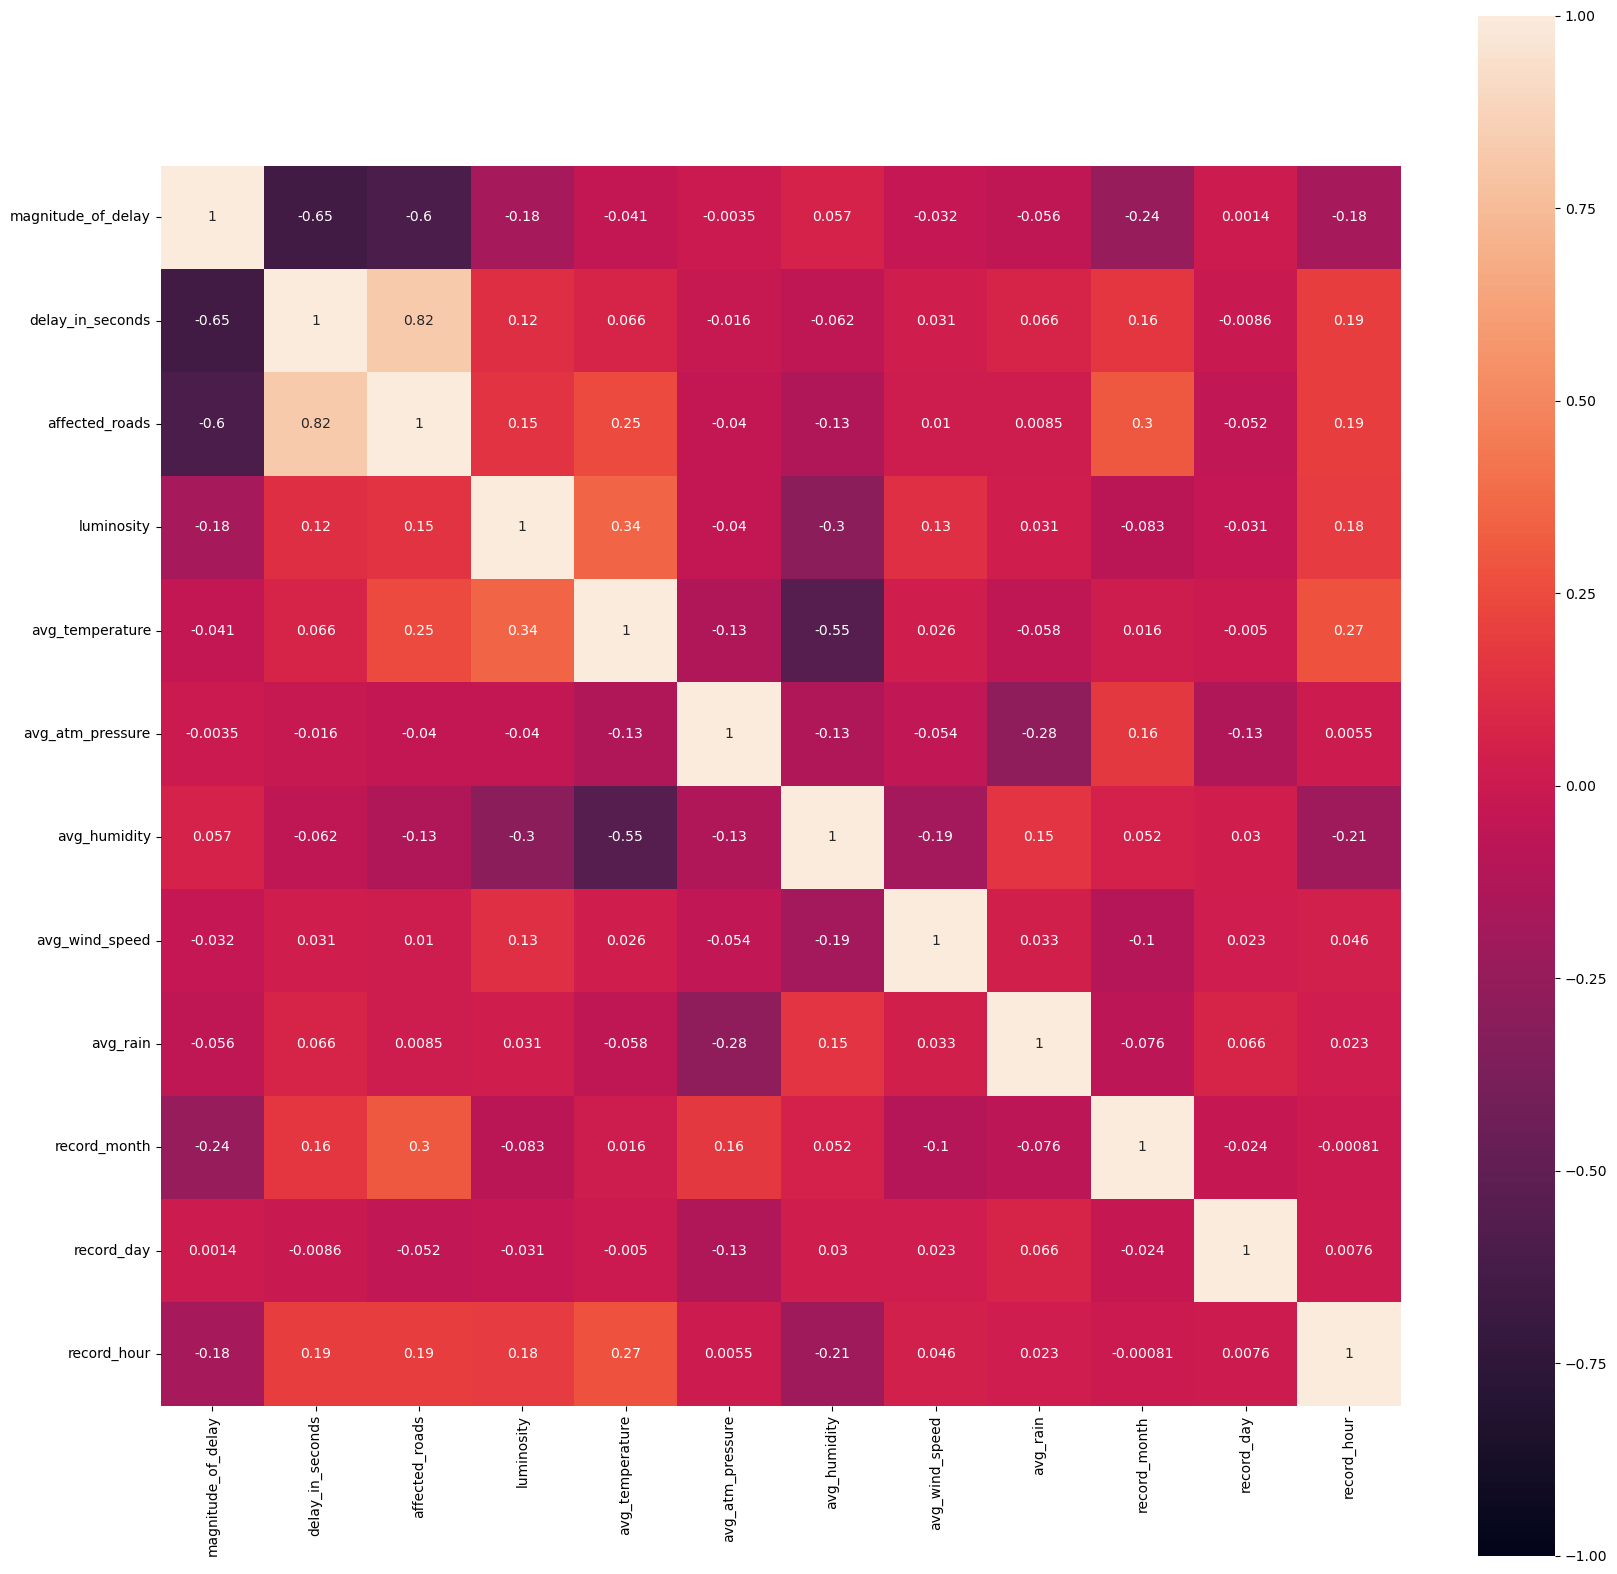

In [805]:
corr_matrix = dftrain.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Pairplot

### Histogramas

## Preparação dos dados

### Apagar atributos

In [792]:
# Era sempre Guimarães em todos os registos, logo não tem impacto nenhum
dftrain = dftrain.drop(["city_name"], axis=1)
dftest = dftest.drop(["city_name"], axis=1)

# Era sempre 0 em todos os registos, logo não tem impacto nenhum
dftrain = dftrain.drop(["avg_precipitation"], axis=1)
dftest = dftest.drop(["avg_precipitation"], axis=1)

# Era sempre 0 em todos os registos, logo não tem impacto nenhum
#dftrain = dftrain.drop(["delay_in_seconds"], axis=1)
#dftest = dftest.drop(["delay_in_seconds"], axis=1)

### Alteração do tipo dos atributos

#### Label Encoding

In [793]:
label_encoder = preprocessing.LabelEncoder()

#Train
dftrain['magnitude_of_delay']= label_encoder.fit_transform(dftrain['magnitude_of_delay'])
dftrain['luminosity']= label_encoder.fit_transform(dftrain['luminosity'])
dftrain['avg_rain']= label_encoder.fit_transform(dftrain['avg_rain'])

#Test
dftest['magnitude_of_delay']= label_encoder.fit_transform(dftest['magnitude_of_delay'])
dftest['luminosity']= label_encoder.fit_transform(dftest['luminosity'])
dftest['avg_rain']= label_encoder.fit_transform(dftest['avg_rain'])

#### Atributo affected_roads

##### Quantidade de vezes que estradas aparecem

In [794]:
dftrain['affected_roads']  = dftrain['affected_roads'].apply(lambda x: 0 if pd.isnull(x) else len(list(filter(None, x.split(',')))))
dftest['affected_roads']   = dftest['affected_roads'].apply(lambda x: 0 if pd.isnull(x) else len(list(filter(None, x.split(',')))))

##### Quantidade de vezes que cada tipo de estrada aparece

#### String to Date

In [795]:
# TRAIN
dftrain['record_date'] = pd.to_datetime(dftrain['record_date'], format='%Y-%m-%d %H:%M')

# Este dataset é apenas num ano, logo será igual para todos os registos
dftrain['record_month'] = dftrain['record_date'].dt.month
dftrain['record_day'] = dftrain['record_date'].dt.day
dftrain['record_hour'] = dftrain['record_date'].dt.hour

# Já não precisamos do record_date para nada
dftrain = dftrain.drop(["record_date"], axis=1)

# TEST
dftest['record_date'] = pd.to_datetime(dftest['record_date'], format='%Y-%m-%d %H:%M')

# Este dataset é apenas num ano, logo será igual para todos os registos
dftest['record_month'] = dftest['record_date'].dt.month
dftest['record_day'] = dftest['record_date'].dt.day
dftest['record_hour'] = dftest['record_date'].dt.hour

# Já não precisamos do record_date para nada
dftest = dftest.drop(["record_date"], axis=1)

#### Tipo do atributo dependente

In [796]:
dftrain['incidents'] = pd.Categorical(dftrain['incidents'])

## Modelos

### Preparação prévia

#### Separação da variável dependente

In [ ]:
X_train = dftrain.drop(['incidents'], axis=1)
Y_train = dftrain['incidents'].to_frame()

#### Separação entre dataframe de teste e de treino

##### Modo de Treino

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

### Treino dos modelos

#### Decision Tree

In [799]:
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=123)

### Previsões

In [800]:
predictions = clf.predict(X_test)

## Métricas de Qualidade

#### Accuracy

In [801]:
print(" Accuracy: " + str( accuracy_score(Y_test, predictions)))

 Accuracy: 0.9136


#### Médias de métricas por peso

* __micro__: Calculate metrics globally by counting the total true positives, false negatives and false positives. 
* __macro__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
* __weighted__: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [802]:
print("Precision: " + str(precision_score(Y_test, predictions, average= 'weighted')))
print("   Recall: " + str(recall_score(Y_test, predictions, average= 'weighted')))
print(" F1-Score: " + str(f1_score(Y_test, predictions, average= 'weighted')))

Precision: 0.9143398239264848
   Recall: 0.9136
 F1-Score: 0.9137721036793686


#### Métricas por Label

In [803]:
from tabulate import tabulate

# assign data
mydata = [
    ["Precision"] + list(precision_score(Y_test, predictions, average= None)),
    ["Recall"] + list(recall_score(Y_test, predictions, average= None)),
    ["F1-Score"] + list(f1_score(Y_test, predictions, average= None))
]
 
# create header
head = ["Metric"] + list(dftrain['incidents'].cat.categories.values)
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------+----------+----------+----------+----------+-------------+
| Metric    |     High |      Low |   Medium |     None |   Very_High |
+===========+==========+==========+==========+==========+=============+
| Precision | 0.898039 | 0.881081 | 0.788079 | 0.982592 |    0.866197 |
+-----------+----------+----------+----------+----------+-------------+
| Recall    | 0.864151 | 0.862434 | 0.826389 | 0.982592 |    0.911111 |
+-----------+----------+----------+----------+----------+-------------+
| F1-Score  | 0.880769 | 0.871658 | 0.80678  | 0.982592 |    0.888087 |
+-----------+----------+----------+----------+----------+-------------+


### Cross Validation

Cross validation irá fazer vários segmentos e testá-los. Se houver um desvio padrão mt grande entre eles, isso quer dizer que existe over-fitting

In [804]:
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print(scores)
print("Média: " + str(scores.mean()))
print("desvio padrão: " + str(scores.std()))

[0.87733333 0.88533333 0.92533333 0.92533333 0.94133333 0.88
 0.936      0.912      0.896      0.91466667]
Média: 0.9093333333333333
desvio padrão: 0.022183076632624466


## Escrita no Ficheiro

Para fazer uma submissão é preciso meter o seguinte código em modo codigo e nao raw. Tambem é preciso ir a secção Separação entre dataframe de teste e de treino e fazer toggle do que é código e o que é raw

In [ ]:
actual_predictions = clf.predict(dftest) # Predictions on the test set
actual_predictions = pd.DataFrame(actual_predictions, columns=['incidents']) # Convert to dataframe 
actual_predictions.head(10)